In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../Data/income.csv")

In [3]:
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
data.describe()

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


Data Visualization

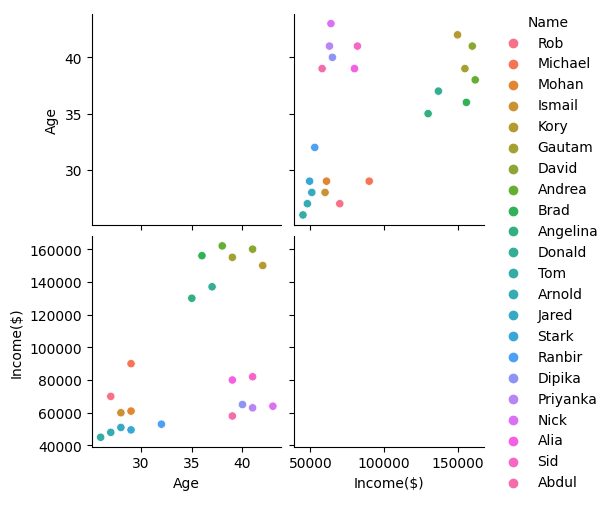

In [10]:
sns.pairplot(data, hue='Name')

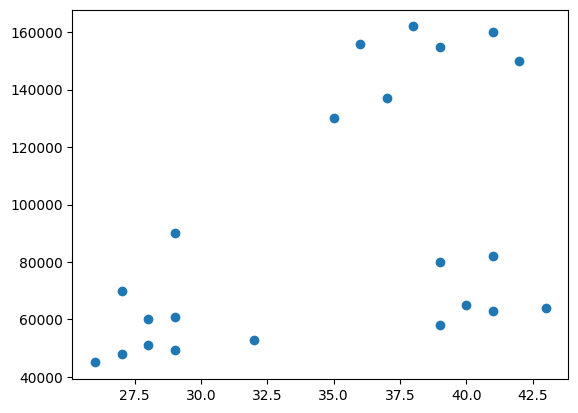

In [12]:
plt.scatter(data['Age'], data['Income($)'])

K = 3

Model Training

In [13]:
from sklearn.cluster import KMeans

In [15]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [16]:
y_pred = km.fit_predict(data[['Age', 'Income($)']])
y_pred

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2],
      dtype=int32)

In [17]:
data['Cluster'] = y_pred
data.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


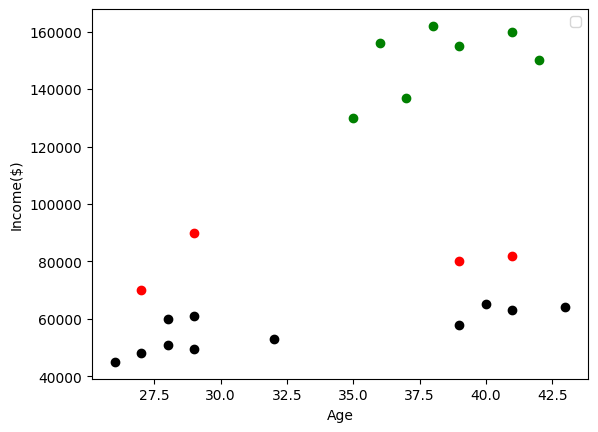

In [21]:
cluster1 = data[data.Cluster==0]
cluster2 = data[data.Cluster==1]
cluster3 = data[data.Cluster==2]

plt.scatter(cluster1.Age, cluster1['Income($)'], color='green')
plt.scatter(cluster2.Age, cluster2['Income($)'], color='red')
plt.scatter(cluster3.Age, cluster3['Income($)'], color='black')

plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[['Income($)']])
data['Income($)'] = scaler.transform(data[['Income($)']])

scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])
data

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [36]:
data['cluster'] = y_pred
data.drop('Cluster', axis='columns', inplace=True)
data

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [39]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

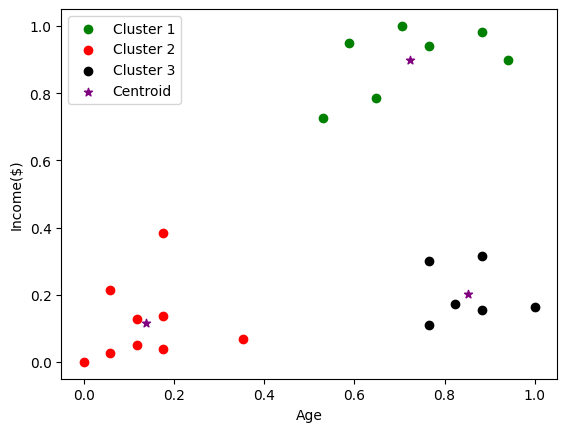

In [43]:
cluster1 = data[data.cluster==0]
cluster2 = data[data.cluster==1]
cluster3 = data[data.cluster==2]

plt.scatter(cluster1.Age, cluster1['Income($)'], color='green', label='Cluster 1')
plt.scatter(cluster2.Age, cluster2['Income($)'], color='red', label='Cluster 2')
plt.scatter(cluster3.Age, cluster3['Income($)'], color='black', label='Cluster 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='Centroid')
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

Evaluation using Elbow Method

In [45]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age', 'Income($)']])
    sse.append(km.inertia_)
sse

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

[5.434011511988177,
 2.0911363886990766,
 0.47507834985530945,
 0.3625079900797327,
 0.2621792762345213,
 0.21055478995472487,
 0.16858512236029755,
 0.13265419827245162,
 0.11190781744710704]

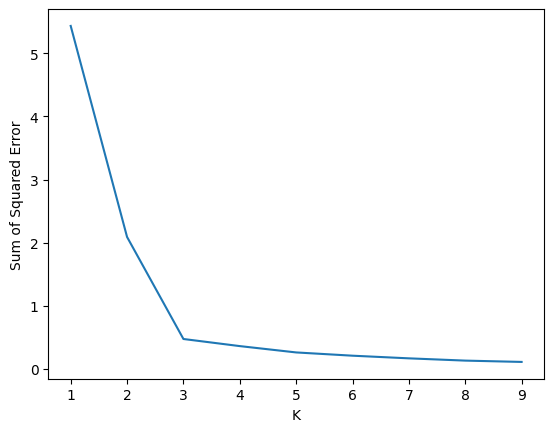

In [46]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_range, sse)

Elbow = 3
K = 3